In [1]:
import os
import config
import numpy as np
import pandas as pd
from scipy.signal import resample
from scipy.stats import mode

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
data_dir = "../../../data/dataset/raw/"
subjects = os.listdir(data_dir)
gestures = config.GESTURES
learning_rate = 3e-4

test_subject = "007"

In [3]:
train_dataset = pd.DataFrame()
test_dataset = pd.DataFrame()

for subject in subjects:
    for gesture in config.GESTURES:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)
            data.drop(columns=["time"], inplace=True)
            data = data.apply(resample, args=(config.SEGMENT_LEN, None, 0))
            
            for_training = subject != test_subject

        #     # ... calculating distance of the index finger
        #     data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
        #             (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

        #     data["dlf1"] = ((data["lf1x"] - data["lpx"]).pow(2) + \
        #             (data["lf1z"] - data["lpz"]).pow(2)).pow(0.5)

            data["drf0x"] = data["rf0x"] - data["rpx"]
            data["drf0y"] = data["rf0y"] - data["rpy"]
            data["drf0z"] = data["rf0z"] - data["rpz"]

            data["drf1x"] = data["rf1x"] - data["rpx"]
            data["drf1y"] = data["rf1y"] - data["rpy"]
            data["drf1z"] = data["rf1z"] - data["rpz"]

            data["label"] = config.GESTURES.index(gesture)

            if for_training:
                train_dataset = pd.concat([train_dataset, data])
            else:
                test_dataset = pd.concat([test_dataset, data])

train_dataset.reset_index(inplace=True)
test_dataset.reset_index(inplace=True)
train_dataset

,index,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,rf0z,...,lf4x,lf4y,lf4z,drf0x,drf0y,drf0z,drf1x,drf1y,drf1z,label
0,0,-6.608069,59.958247,19.360842,-9.343826,68.774876,20.247514,-6.508840,63.852178,5.695187,...,-41.814304,60.980294,2.524857,0.099229,3.893931,-13.665656,-1.438373,3.969895,-50.970593,0
1,1,-11.372660,102.337328,34.634097,-16.858438,124.085888,36.531230,-92.139376,104.732563,12.983442,...,-75.442740,110.022647,4.555429,-80.766716,2.395235,-21.650654,-24.435209,23.184260,-90.575245,0
2,2,-11.398428,102.826734,34.457183,-16.759562,123.358112,36.316970,-76.298842,106.069364,12.435599,...,-75.000260,109.377353,4.528711,-64.900413,3.242630,-22.021584,-20.133036,19.964372,-90.307978,0
3,3,-11.409317,102.759617,34.605644,-16.858438,124.085888,36.531230,-85.918522,105.472387,12.853721,...,-75.442740,110.022647,4.555429,-74.509205,2.712770,-21.751923,-22.770234,21.873154,-90.686315,0
4,4,-11.357979,102.578288,34.388012,-16.759562,123.358112,36.316970,-79.137049,105.614143,12.572882,...,-75.000260,109.377353,4.528711,-67.779070,3.035854,-21.815130,-20.928603,20.470597,-90.263742,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149845,145,-18.958171,154.817277,75.649850,-25.858632,169.038715,59.970166,-113.173476,154.421146,69.900119,...,-76.200763,145.314141,13.813910,-94.215305,-0.396131,-5.749732,-26.478814,10.788288,-101.673058,13
149846,146,-18.299899,152.024028,74.276472,-25.706968,168.047285,59.618434,-112.106843,151.445335,68.398810,...,-75.753837,144.461859,13.732890,-93.806944,-0.578693,-5.877662,-25.733438,9.947693,-100.753324,13
149847,147,-18.774816,155.144610,75.676438,-25.858632,169.038715,59.970166,-113.136972,154.850759,69.827290,...,-76.200763,145.314141,13.813910,-94.362157,-0.293851,-5.849148,-26.091699,10.898056,-101.733361,13
149848,148,-17.793418,150.817466,73.632532,-25.706968,168.047285,59.618434,-111.718866,150.049738,67.477089,...,-75.753837,144.461859,13.732890,-93.925448,-0.767729,-6.155443,-25.252664,9.630910,-100.932117,13


# Scaler Metrics

In [4]:
# from sklearn.preprocessing import MinMaxScaler

# features = dataset[["drf0x", "drf0y", "drf0z", "drf1x", "drf1y", "drf1z"]]
# scaler = MinMaxScaler()
# scaler.fit(features)
# scaler.data_max_ - scaler.data_min_

In [5]:
train_features = train_dataset[config.INFERENCE_FEATURES + ["label"]]
test_features = test_dataset[config.INFERENCE_FEATURES + ["label"]]
train_features

,rpx,rpy,rpz,rf0x,rf0y,rf0z,rf1x,rf1y,rf1z,label
0,-6.608069,59.958247,19.360842,-6.508840,63.852178,5.695187,-8.046442,63.928142,-31.609751,0
1,-11.372660,102.337328,34.634097,-92.139376,104.732563,12.983442,-35.807870,125.521588,-55.941148,0
2,-11.398428,102.826734,34.457183,-76.298842,106.069364,12.435599,-31.531465,122.791106,-55.850795,0
3,-11.409317,102.759617,34.605644,-85.918522,105.472387,12.853721,-34.179551,124.632771,-56.080671,0
4,-11.357979,102.578288,34.388012,-79.137049,105.614143,12.572882,-32.286582,123.048885,-55.875731,0
...,...,...,...,...,...,...,...,...,...,...
149845,-18.958171,154.817277,75.649850,-113.173476,154.421146,69.900119,-45.436985,165.605565,-26.023208,13
149846,-18.299899,152.024028,74.276472,-112.106843,151.445335,68.398810,-44.033338,161.971722,-26.476851,13
149847,-18.774816,155.144610,75.676438,-113.136972,154.850759,69.827290,-44.866515,166.042666,-26.056923,13
149848,-17.793418,150.817466,73.632532,-111.718866,150.049738,67.477089,-43.046082,160.448376,-27.299585,13


In [6]:
import tensorflow as tf

from tensorflow.keras import layers, models, losses, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2022-06-26 17:12:34.821380: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
scaler = MinMaxScaler()
# X = features.drop(columns=["label"]).to_numpy()
# X = scaler.fit_transform(X)
# X = X.reshape((-1, config.SEGMENT_LEN, len(config.INFERENCE_FEATURES)))
# y = features["label"].to_numpy().reshape((-1, config.SEGMENT_LEN))
# y, _ = mode(y, axis=1)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33, random_state=42
# )

X_train = train_features.drop(columns=["label"]).to_numpy()
X_test = test_features.drop(columns=["label"]).to_numpy()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((-1, config.SEGMENT_LEN, len(config.INFERENCE_FEATURES)))
X_test = X_test.reshape((-1, config.SEGMENT_LEN, len(config.INFERENCE_FEATURES)))

y_train = train_features["label"].to_numpy().reshape((-1, config.SEGMENT_LEN))
y_test = test_features["label"].to_numpy().reshape((-1, config.SEGMENT_LEN))

y_train, _ = mode(y_train, axis=1)
y_test, _ = mode(y_test, axis=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(999, 150, 9)
(168, 150, 9)
(999, 1)
(168, 1)


In [8]:
def conv_block_1d():
    inputs = layers.Input(shape=(config.SEGMENT_LEN, 1))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Flatten()(x)
    output = layers.Dense(64)(x)

    return inputs, output

def get_model(n_channels: int):
    inputs = []
    features = []

    for _ in range(n_channels):
        input_1d, features_1d = conv_block_1d()
        inputs.append(input_1d)
        features.append(features_1d)

    x = layers.concatenate(features, axis=-1)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(len(gestures), activation="softmax")(x)

    return models.Model(inputs, output)

In [9]:
model = get_model(n_channels=len(config.INFERENCE_FEATURES))

loss = losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=["accuracy"]
)

2022-06-26 17:12:36.035664: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-26 17:12:36.035695: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Andromeda
2022-06-26 17:12:36.035700: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Andromeda
2022-06-26 17:12:36.035810: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.48.7
2022-06-26 17:12:36.035827: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-06-26 17:12:36.035831: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.48.7
2022-06-26 17:12:36.036099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions i

In [10]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=30,
        restore_best_weights=True
    )
]

history = model.fit(
    x=np.split(X_train, len(config.INFERENCE_FEATURES), axis=-1),
    y=y_train,
    validation_data=(
        np.split(X_test, len(config.INFERENCE_FEATURES), axis=-1),
        y_test
    ),
    batch_size=32,
    epochs=300,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/300
32/32 [==============================] - 5s 41ms/step - loss: 2.9581 - accuracy: 0.1261 - val_loss: 2.6082 - val_accuracy: 0.1607
Epoch 2/300
32/32 [==============================] - 1s 18ms/step - loss: 2.1846 - accuracy: 0.2853 - val_loss: 2.5201 - val_accuracy: 0.2679
Epoch 3/300
32/32 [==============================] - 1s 19ms/step - loss: 1.8905 - accuracy: 0.3844 - val_loss: 2.3295 - val_accuracy: 0.3036
Epoch 4/300
32/32 [==============================] - 1s 17ms/step - loss: 1.6740 - accuracy: 0.4685 - val_loss: 2.0731 - val_accuracy: 0.3631
Epoch 5/300
32/32 [==============================] - 1s 17ms/step - loss: 1.4363 - accuracy: 0.5325 - val_loss: 1.8096 - val_accuracy: 0.4048
Epoch 6/300
32/32 [==============================] - 1s 17ms/step - loss: 1.3022 - accuracy: 0.5956 - val_loss: 1.6545 - val_accuracy: 0.4524
Epoch 7/300
32/32 [==============================] - 1s 18ms/step - loss: 1.1359 - accuracy: 0.6346 - val_loss: 1.4199 - val_accuracy: 0.5655
Epoch 

In [11]:
model.evaluate(np.split(X_test, len(config.INFERENCE_FEATURES), axis=-1), y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.7735 - accuracy: 0.7976


[0.7735306620597839, 0.7976190447807312]

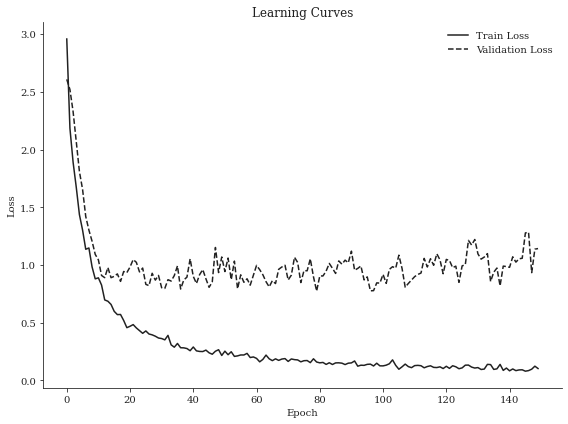

In [12]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    # "text.usetex": True,
    "font.family": "serif",
    # "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "text.color": "#212121",
    "axes.edgecolor": "#212121",
    "xtick.color": "#212121",
    "ytick.color": "#212121",
    "axes.labelcolor": "#212121",
    'legend.frameon': False,
})

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(history.history["loss"], "-", color="#212121", label="Train Loss")
ax.plot(history.history["val_loss"], "--", color="#212121", label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Learning Curves")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# tf.keras.backend.clear_session()

In [14]:
import joblib
joblib.dump(scaler, "../../models/scaler.joblib")
model.save("../../models/stack_cnn")

FileNotFoundError: [Errno 2] No such file or directory: '../../models/scaler.joblib'